# Handwritten digits recognition (using Convolutional Neural Network)

To build a Convolutional Neural Network(CNN) to recognize handwritten digits.

A **convolutional neural network** is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

# Importing the Dependencies

In [1]:
import tensorflow as tf          #for developing and training ML models.
from tensorflow import keras     
import matplotlib.pyplot as plt  #for plotting the data
import seaborn as sn             #for plotting confusion matrix.
import numpy as np               #for linear algebra operations.
import pandas as pd              #for displaying training/test data in a table.
import math                      #for calculating square roots etc.


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [3]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(IMAGES, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1
print('IMAGES: ', IMAGES);
print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGES:  60000
IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


**Explore the data**

Each image in the dataset is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [5]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


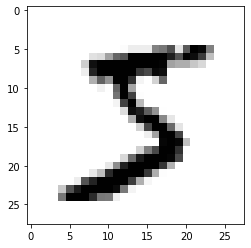

In [6]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

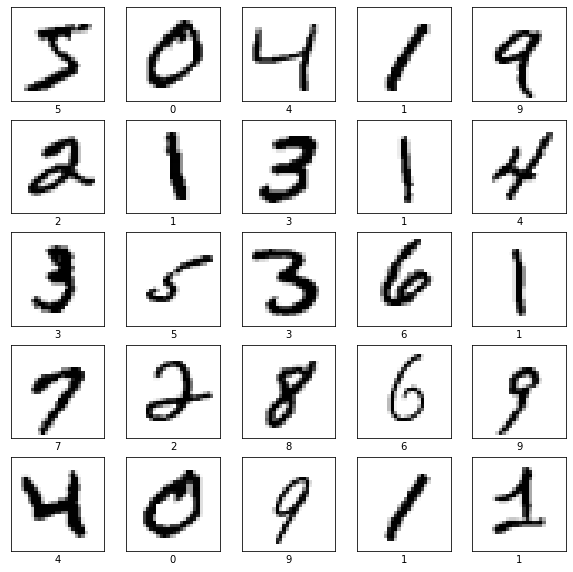

In [7]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Reshaping the data

In order to use convolution layers we need to reshape our data and add a color channel to it. Every digit has a shape of `(28, 28)` which means that it is a 28x28 matrix of color values form `0` to `255`. We need to reshape it to `(28, 28, 1)` shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [8]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [9]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (60000, 28, 28, 1)
x_test_with_chanels: (10000, 28, 28, 1)


## Normalize the data

Move values fromrange of `[0...255]` to `[0...1]`.

In [10]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [11]:
#  checking one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

## Build the model

We will use **Sequential Keras** model.

we will have two pairs of **Convolution2D** and **MaxPooling2D** layers. 

The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use **Flatten layer** to convert multidimensional parameters to vector.

The last layer will be a **Dense**. The output represents the network guess. 


Here is our model summary so far.

In [12]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(28,28,1 ),
    kernel_size=5,
    filters=8,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

## Compile the model

In [14]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Training the model

In [15]:


training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=5,
)

Epoch 1/5
1875/1875 [==============================] - 45s 16ms/step - loss: 0.2051 - accuracy: 0.9367
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0691 - accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0502 - accuracy: 0.9848
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0415 - accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0338 - accuracy: 0.9888


Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

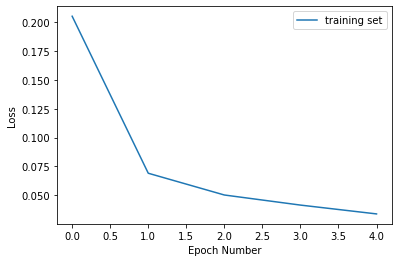

In [16]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.legend()

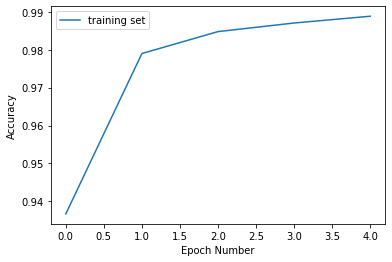

In [17]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')

plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [18]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [19]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.017783215269446373
Training accuracy:  0.9942833185195923


### Test set accuracy

In [20]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [21]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.02746639959514141
Validation accuracy:  0.9915000200271606


## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [22]:
predictions_one_hot = model.predict([x_test_normalized])

In [23]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [24]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.490846e-11,5.593721e-09,7.050995e-08,3.372809e-08,9.022256e-10,1.067684e-10,3.649783e-16,9.999982e-01,9.340062e-10,1.609429e-06
1,1.749382e-06,4.977977e-07,9.999970e-01,2.284552e-09,1.249460e-09,6.707584e-12,4.868710e-08,7.335037e-09,6.948292e-07,2.409024e-12
2,1.479335e-07,9.999964e-01,1.288186e-08,4.797563e-11,2.175946e-07,5.109481e-08,1.784183e-08,3.101162e-06,6.808391e-08,8.488837e-08
3,9.999778e-01,4.336013e-09,1.157067e-07,6.072512e-08,1.010423e-08,2.220052e-06,1.815324e-05,3.384631e-07,2.098833e-07,1.128922e-06
4,6.186929e-12,3.953818e-11,6.798824e-12,1.230736e-13,9.999887e-01,5.059760e-11,2.923342e-11,6.773126e-10,1.000838e-10,1.130220e-05
...,...,...,...,...,...,...,...,...,...,...
9995,4.647413e-09,3.835434e-07,9.999859e-01,4.068883e-09,1.575833e-11,4.256621e-16,3.492287e-14,1.372866e-05,1.569548e-08,4.946304e-13
9996,1.462880e-11,9.180081e-09,4.443057e-10,9.999995e-01,4.314265e-11,4.851025e-07,9.840201e-14,1.414604e-10,3.618272e-08,2.197570e-09
9997,2.444331e-16,9.968072e-11,1.733867e-14,9.804328e-18,1.000000e+00,2.317084e-14,2.602322e-14,7.925464e-13,9.343138e-11,4.038107e-09
9998,1.072065e-09,5.444664e-14,3.250183e-14,2.573310e-10,9.353494e-12,9.961166e-01,7.956986e-07,1.117626e-14,3.882581e-03,6.588927e-09


In [25]:
#  extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


So our model is predicting that the first example from the test set is `7`.

In [26]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

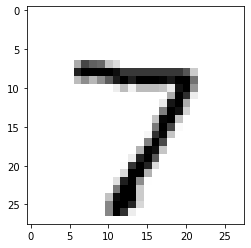

In [27]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [28]:
print(y_test[0])

7


We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

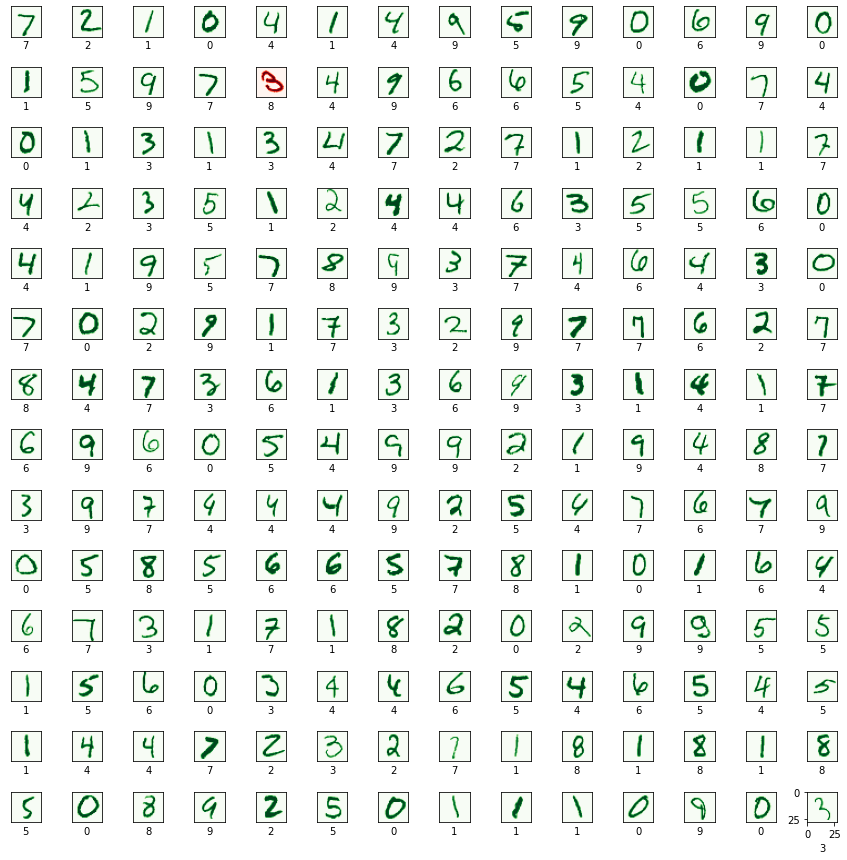

In [29]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

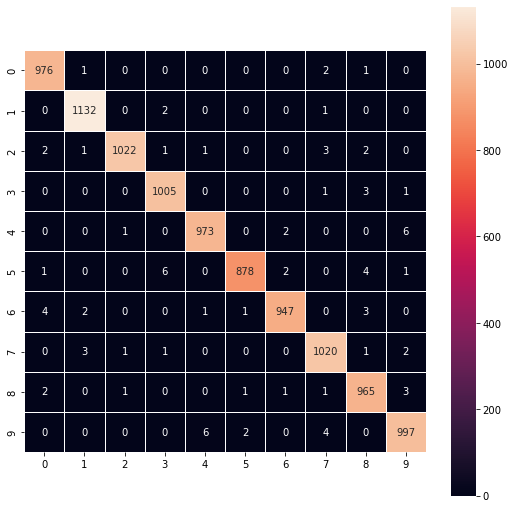

In [30]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
)
plt.show()